
prerequistes:
1. simple plotting
2. basics
3. reading documentation

# Reading and writing data


While studying chemistry, we will inevitably gather data. If we want to interrogate that data using Python, we need a means to parse that data. Perhaps you have collected some data from a pratcical lab, and have copied said data into Excel, and would now like to analyse it in a Jupyter notebook. Or perhaps you are using a computer program to run simulations, and need to load the data into a notebook to check your results. In this section, we'll going into the basics of dealing with data files.

## Parsing text files

For our first example: imagine we have run a program to compute the relative energies of three conformers of the same molecule. This is stored in the file  "computational_output.txt". We want to read in the results as python variables to determine our ground state, and do any subsequent analysis we might require. We open files using the open function, starting with an example of **what not to do**.

In [19]:
# First, we read in the file as some variable name,
computational_results = open('computational_output.txt')

# computational results is now an interable object, like a
# list, comprised of strings.
for line in computational_results:
        print(line)

# We must close the file as below when we've finished,
computational_results.close()

Starting program...

Loading atomic coordinates...

Starting the calculation...

Conformer 1 energy = 2331.2 kcal mol-1

Conformer 2 energy = 2329.1 kcal mol-1

Conformer 3 energy = 2330.4 kcal mol-1

Calculation complete


The above clearly works for printing the file, so why is it bad practice? It's easy to forget to `close` the file at the end. Much like having too many applications running at once on your computer, too many opened files in python is going to drain your computers resources. Not so bad for a 7 line text file, but the outputs of popular computational analysis packages can easily be as large as a few gigabytes. We ensure the file is always closed by wrapping our file processing in a `with` statement. The `with` statement will automatically close the file when the code within it has finished running. To achieve the exact same as above, but employing best practice, we can instead write

In [20]:
with open('computational_output.txt') as results_file:
    for line in results_file:
        print(line)

Starting program...

Loading atomic coordinates...

Starting the calculation...

Conformer 1 energy = 2331.2 kcal mol-1

Conformer 2 energy = 2329.1 kcal mol-1

Conformer 3 energy = 2330.4 kcal mol-1

Calculation complete


All well and good, but how do we processing the data? We can use any tools we would normally use for processing strings. For example

In [21]:
energy_strings = []

with open('computational_output.txt') as results_file:
    for line in results_file:
        # we can use a conditional to find any line that contains
        # '=', as we know these contain our energies
        if '=' in line:
            energy_strings.append(line)

# we can then 'split' the strings into individual
# strings, breaking on whitespace, and returning a list

print(energy_strings[0].split())

['Conformer', '1', 'energy', '=', '2331.2', 'kcal', 'mol-1']


We know that our output file has a consistent format, so for any lines that contains an '=' sign, the fifth value in a split of that line (i.e. index 4), will have the energy of our conformer. In code,

In [22]:
energies = []

# iterative over the lines we know contain our conformer energies
# we'll add these to a list, ensuring that we convert from strings
# to floats

for line in energy_strings:
    energy_string = line.split()[4]
    energies.append(float(energy_string))
    
print(energies)

[2331.2, 2329.1, 2330.4]


The energies are now stored as floats in the list `energies` for us to do whatever analysis we need. 

## Excercise

Copy the code above to retrieve the energies from the data file, but rather than storing the energies as a list, store them in a dictonary with the format `{'conformer_1_energy': ..., 'conformer_2_energy': ..., 'conformer_3_energy': ...}`. Do this in a way that ensures if we change the number of conformers, the code will still store all the energies in a dictionary.



In [23]:
### Write your code here

## Parsing standard data files

One very common format for numerical data to be stored in is a 'comma separeted values' or .csv file. These files contain rows and columns of data, sepearted by ',' symbols, and are easily converted into numpy arrays. If you want to work on some data you were provided in a spreadsheet using python, you could save that spreadsheet as a `.csv` file, and then read it in as follows, using the numpy function `loadtxt`,

In [1]:
import numpy as np

# first argument is the filename, the second is the 'delimiter'
# i.e. what seperates the values, in our case, ',', we need to 
# also add skiprows = 1 as the first line of the file is strings
# that cannot be converted to floats

benzene_data = np.loadtxt('benzene_data.csv', delimiter = ',', skiprows = 1)

print(benzene_data)

[[  320.    10887.   ]
 [  320.5   10880.   ]
 [  321.    10873.   ]
 [  321.5   10866.   ]
 [  322.    10859.   ]
 [  322.5   10852.   ]
 [  323.    10845.   ]
 [  323.5   10838.   ]
 [  324.    10831.   ]
 [  324.5   10824.   ]
 [  325.    10817.   ]
 [  325.5   10810.   ]
 [  326.    10803.   ]
 [  326.5   10796.   ]
 [  327.    10789.   ]
 [  327.5   10782.   ]
 [  328.    10775.   ]
 [  328.5   10768.   ]
 [  329.    10761.   ]
 [  329.5   10754.   ]
 [  330.    10747.   ]
 [  330.5   10740.   ]
 [  331.    10733.   ]
 [  331.5   10726.   ]
 [  332.    10719.   ]
 [  332.5   10712.   ]
 [  333.    10705.   ]
 [  333.5   10697.   ]
 [  334.    10690.   ]
 [  334.5   10683.   ]
 [  335.    10676.   ]
 [  335.5   10669.   ]
 [  336.    10662.   ]
 [  336.5   10655.   ]
 [  337.    10648.   ]
 [  337.5   10641.   ]
 [  338.    10634.   ]
 [  338.5   10627.   ]
 [  339.    10619.   ]
 [  339.5   10612.   ]
 [  340.    10605.   ]
 [  340.5   10598.   ]
 [  341.    10591.   ]
 [  341.5  

`benzene_data` now contains the content of the file `benzene_data.csv`, that is to say the density of a benzene sample in $\mathrm{mol~m}^{-3}$ as a function of temperature in $\mathrm{K}$. It is an array of arrays. Each sub array contains two values, a temperature and a density. The csv file has been read 'row-wise'. If we wanted to read it 'column-wise' (which we often do), and return an array of two sub-arrays: all temperatures, and all densities, we add one argument to out `loadtxt()` call, 

In [25]:
# unpack = True will ensure that the data is read in column-wise, and we are left with an array of two arrays.

benzene_data = np.loadtxt('benzene_data.csv', delimiter = ',', skiprows = 1,unpack=True)

print(benzene_data)

[[  320.      320.5     321.      321.5     322.      322.5     323.
    323.5     324.      324.5     325.      325.5     326.      326.5
    327.      327.5     328.      328.5     329.      329.5     330.
    330.5     331.      331.5     332.      332.5     333.      333.5
    334.      334.5     335.      335.5     336.      336.5     337.
    337.5     338.      338.5     339.      339.5     340.      340.5
    341.      341.5     342.      342.5     343.      343.5     344.
    344.5     345.      345.5     346.      346.5     347.      347.5
    348.      348.5     349.      349.5     350.      350.5     351.
    351.5     352.      352.5     353.      353.13    353.13    353.5
    354.      354.5     355.      355.5     356.      356.5     357.
    357.5     358.      358.5     359.      359.5     360.      360.5
    361.      361.5     362.      362.5     363.      363.5     364.
    364.5     365.      365.5     366.      366.5     367.      367.5
    368.      368.5     369

We can then do whatever we like with these arrays, such as plot against each other.

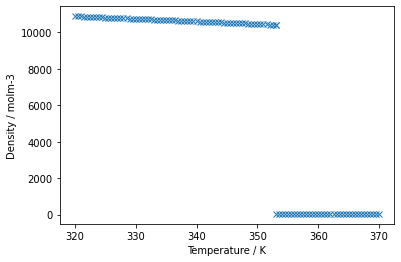

In [26]:
import matplotlib.pyplot as plt

plt.plot(benzene_data[0],benzene_data[1],'x')
plt.xlabel('Temperature / K')
plt.ylabel('Density / molm-3')
plt.show()

From the above plot, it's clear to see the boiling point of benzene as the density drops dramatically. These data were taken from the NIST website \[1\], where you can get access to all manner of chemical and physical properties of different chemical systems, download them as `.csv` files, and now you have the tools to do whatever you like with them!

## Excercise

Read in the benzene_data.csv file, and convert the temperature array from Kelvin to Celcius, then, using the [`np.savetext`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) fucntion, write that information back to a `.csv` file. If you can't understand how to do this from the numpy documentation, re-read the chapter on reading and understanding python documentation to get help.



In [27]:
### Write your code here

## References

1. Eric W. Lemmon, Mark O. McLinden and Daniel G. Friend, "Thermophysical Properties of Fluid Systems" in NIST Chemistry WebBook, NIST Standard Reference Database Number 69, Eds. P.J. Linstrom and W.G. Mallard, National Institute of Standards and Technology, Gaithersburg MD, 20899, https://doi.org/10.18434/T4D303, (retrieved June 16, 2020).
